# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('/root/GWData-Bootcamp/2023/machine_learning/KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

/tmp/ipykernel_3450/2980780030.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

In [6]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

In [7]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 百分之20用于测试

SeriousDlqin2yrs
0    101322
1      7326
Name: count, dtype: int64


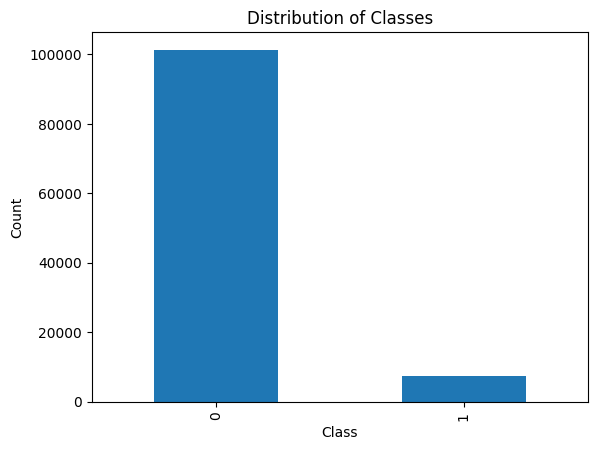

In [9]:
#通过SeriousDlqin2yrs字段查看正负样本分布情况
#提示：value_counts
#绘制两种类别的柱状图
#提示：dataframe可以直接plot(kind='bar')
import matplotlib.pyplot as plt

# 查看正负样本分布情况
class_counts = y.value_counts()

# 打印结果
print(class_counts)

# 绘制柱状图
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()



#### 2.数据预处理之离散化

103
0         15
1         13
2         12
3         10
4         16
          ..
112910    16
112911    24
112912    14
112913    10
112914    21
Name: age_discretized, Length: 108648, dtype: int64


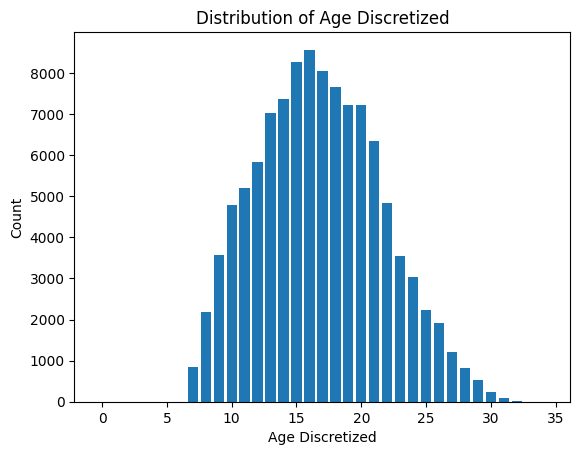

In [15]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
import pandas as pd

# 转化成整数

X['age'] = X['age'].astype(int)

print(max(X['age']))
# 计算分桶边界
age_bins = range(0, max(X['age']) + 4, 3)

# 进行离散化
X['age_discretized'] = pd.cut(X['age'], bins=age_bins, labels=False, right=False)

# 打印离散化后的结果
print(X['age_discretized'])

# 统计每个年龄段的计数
age_counts = X['age_discretized'].value_counts().sort_index()

# 绘制柱状图
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age Discretized')
plt.ylabel('Count')
plt.title('Distribution of Age Discretized')
plt.show()


#### 3.数据预处理之独热向量编码

In [11]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
import pandas as pd

# 对离散化后的年龄段进行独热向量编码
age_encoded = pd.get_dummies(X['age_discretized'], prefix='age')

# 将编码结果与原始数据集合并
X_encoded = pd.concat([X, age_encoded], axis=1)

# 打印编码后的结果
X_encoded.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_discretized,age_0,age_7,age_8,age_9,age_10,age_11,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34
0,0.766127,45,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,15,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.957151,40,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,13,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.658180,38,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,12,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.233810,30,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,10,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0.907239,49,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,16,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 4.数据预处理之幅度缩放

In [13]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler

# 创建一个StandardScaler对象
scaler = StandardScaler()

# 对连续值特征进行幅度缩放
X_scaled = scaler.fit_transform(X)

# 打印缩放后的结果
print(X_scaled)

[[-0.0201068  -0.44012195  0.45992706 ... -0.05427348  0.99468893
  -0.37056727]
 [-0.0193715  -0.78605882 -0.1074063  ... -0.05427348  0.12476948
  -0.78509046]
 [-0.02052231 -0.92443357  0.17626038 ... -0.05427348 -0.74514997
  -0.99235205]
 ...
 [-0.02190201 -0.50930932 -0.1074063  ... -0.05427348  0.99468893
  -0.57782887]
 [-0.0230558  -1.47793256 -0.1074063  ... -0.05427348 -0.74514997
  -1.40687523]
 [-0.01978286  0.87443816 -0.1074063  ... -0.05427348 -0.74514997
   0.87300228]]


#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [18]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression

# 创建逻辑回归模型对象
model = LogisticRegression()

# 使用训练数据拟合模型
model.fit(X_train, y_train)

# 输出系数
coefficients = model.coef_
intercept = model.intercept_

# 分析特征重要性
feature_importance = abs(coefficients[0])
sorted_indices = feature_importance.argsort()[::-1]
sorted_features = X_train.columns[sorted_indices]

# 打印系数和特征重要性
print("Intercept:", intercept)
print("Coefficients:")
for feature, coef in zip(sorted_features, coefficients[0, sorted_indices]):
    print(f"{feature}: {coef}")



Intercept: [-0.13710928]
Coefficients:
NumberOfTime60-89DaysPastDueNotWorse: -0.32889330018818197
NumberOfTime30-59DaysPastDueNotWorse: 0.31716574622696886
NumberOfDependents: 0.18901828399205395
DebtRatio: 0.05218217069190731
age: -0.0459144360578327
NumberOfTimes90DaysLate: 0.043856000455064506
NumberOfOpenCreditLinesAndLoans: -0.04309815541758128
NumberRealEstateLoansOrLines: 0.028029112770613533
RevolvingUtilizationOfUnsecuredLines: -0.009140646278000845
MonthlyIncome: -4.117863504515253e-05


/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [19]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 创建逻辑回归模型对象
model = LogisticRegression()

# 定义参数候选空间
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100, 500]
}

# 创建网格搜索交叉验证对象
grid_search = GridSearchCV(model, param_grid, cv=5)

# 使用训练数据拟合模型
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Best parameters: {'C': 100, 'penalty': 'l2'}
Best score: 0.9329482968361296


/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# 输出最好的超参数
# 输出最好的模型
# 输出最佳超参数
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# 输出最佳模型
best_model = grid_search.best_estimator_
print("Best model:", best_model)


Best parameters: {'C': 100, 'penalty': 'l2'}
Best model: LogisticRegression(C=100)


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [21]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score

# 在测试集上进行预测
y_pred = best_model.predict(X_test)

# 计算查准率
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# 计算查全率
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# 计算AUC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# 计算混淆矩阵
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# 计算F1值
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)



Precision: 0.5581395348837209
Recall: 0.016172506738544475
AUC: 0.6776398279597607
Confusion Matrix:
[[20227    19]
 [ 1460    24]]
F1 Score: 0.031434184675834975


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [22]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 定义阈值列表
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# 初始化结果字典
results = {}

# 遍历阈值列表
for threshold in thresholds:
    # 根据阈值确定预测结果
    y_pred = (y_pred_proba > threshold).astype(int)
    
    # 计算混淆矩阵
    confusion = confusion_matrix(y_test, y_pred)
    
    # 计算查准率
    precision = precision_score(y_test, y_pred)
    
    # 计算查全率
    recall = recall_score(y_test, y_pred)
    
    # 计算F1值
    f1 = f1_score(y_test, y_pred)
    
    # 存储结果
    results[threshold] = {
        'Confusion Matrix': confusion,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# 打印结果
for threshold, result in results.items():
    print("Threshold:", threshold)
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Precision:", result['Precision'])
    print("Recall:", result['Recall'])
    print("F1 Score:", result['F1 Score'])
    print()


Threshold: 0.1
Confusion Matrix:
[[15428  4818]
 [  787   697]]
Precision: 0.12638259292837714
Recall: 0.4696765498652291
F1 Score: 0.19917131018716958

Threshold: 0.2
Confusion Matrix:
[[19635   611]
 [ 1250   234]]
Precision: 0.27692307692307694
Recall: 0.15768194070080863
F1 Score: 0.20094461142121078

Threshold: 0.3
Confusion Matrix:
[[20147    99]
 [ 1406    78]]
Precision: 0.4406779661016949
Recall: 0.05256064690026954
F1 Score: 0.09391932570740517

Threshold: 0.4
Confusion Matrix:
[[20211    35]
 [ 1451    33]]
Precision: 0.4852941176470588
Recall: 0.02223719676549865
F1 Score: 0.04252577319587628

Threshold: 0.5
Confusion Matrix:
[[20227    19]
 [ 1460    24]]
Precision: 0.5581395348837209
Recall: 0.016172506738544475
F1 Score: 0.031434184675834975

Threshold: 0.6
Confusion Matrix:
[[20232    14]
 [ 1469    15]]
Precision: 0.5172413793103449
Recall: 0.010107816711590296
F1 Score: 0.019828155981493716

Threshold: 0.7
Confusion Matrix:
[[20237     9]
 [ 1472    12]]
Precision: 0.

/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [27]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# 使用逻辑回归模型进行特征选择
selector = SelectFromModel(LogisticRegression(max_iter=1000))
selector.fit(X_train, y_train)

# 获取选择的特征索引
selected_features = selector.get_support(indices=True)

# 检查选择的特征数量是否大于0
if len(selected_features) == 0:
    print("No features selected.")
else:
    # 获取选择的特征名称
    selected_feature_names = X_train.columns[selected_features]

    # 获取选择的特征重要度排序
    feature_importances = selector.estimator_.coef_[0]
    sorted_indices = feature_importances.argsort()[::-1]

    # 输出特征重要度排序
    print("Feature Importance Ranking:")
    for i in sorted_indices:
        # 检查索引是否在选择的特征范围内
        if i < len(selected_feature_names):
            print(selected_feature_names[i], ":", feature_importances[i])

    # 重新建模使用选择的特征
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    # 在选择的特征上训练新的逻辑回归模型
    new_model = LogisticRegression(max_iter=1000)
    new_model.fit(X_train_selected, y_train)

    # 在测试集上进行预测和评估
    y_pred_new = new_model.predict(X_test_selected)
    accuracy_new = accuracy_score(y_test, y_pred_new)
    precision_new = precision_score(y_test, y_pred_new)
    recall_new = recall_score(y_test, y_pred_new)
    f1_new = f1_score(y_test, y_pred_new)

    # 打印评估指标
    print("Accuracy (New Model):", accuracy_new)
    print("Precision (New Model):", precision_new)
    print("Recall (New Model):", recall_new)
    print("F1 Score (New Model):", f1_new)


Feature Importance Ranking:
NumberOfTime60-89DaysPastDueNotWorse : 0.48487436893337343
NumberOfTime30-59DaysPastDueNotWorse : -7.52759672119782e-05
NumberOfTimes90DaysLate : -0.0399102786681723
Accuracy (New Model): 0.9329038196042337
Precision (New Model): 0.6160714285714286
Recall (New Model): 0.04649595687331536
F1 Score (New Model): 0.08646616541353384


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
# 随机森林
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

# 输出最佳参数和对应的得分
print("Random Forest - Best Parameters:", rf_grid_search.best_params_)
print("Random Forest - Best Score:", rf_grid_search.best_score_)

Random Forest - Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest - Best Score: 0.9353298470034953


In [32]:
# SVM
svm_model = SVC()
svm_param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=3)
svm_grid_search.fit(X_train, y_train)

# 输出最佳参数和对应的得分
print("SVM - Best Parameters:", svm_grid_search.best_params_)
print("SVM - Best Score:", svm_grid_search.best_score_)

In [ ]:
# K最近邻
knn_model = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=3)
knn_grid_search.fit(X_train, y_train)

# 输出最佳参数和对应的得分
print("KNN - Best Parameters:", knn_grid_search.best_params_)
print("KNN - Best Score:", knn_grid_search.best_score_)

In [ ]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC
# K最近邻
from sklearn.neighbors import KNeighborsClassifier

